# Итоговая работа.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin,cos,tan

from scipy.optimize import minimize
from scipy.misc import derivative 


%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])
raitings.shape

(10, 15)

In [3]:
from sklearn.metrics import pairwise_distances

In [4]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

In [5]:
def get_el_number(array, el):
    for i, v in enumerate(array):
        if v.round(5) == el.round(5):
            return i

In [6]:
for i,vector in enumerate(pairwise_distances(raitings, metric = 'cosine')):
    user = get_el_number((vector),max(vector))
    print(i, user)

0 6
1 7
2 6
3 4
4 3
5 6
6 2
7 2
8 3
9 6


B)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

stan_raitings = scaler.fit_transform(raitings)
stan_raitings.shape

(10, 15)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
res = pca.fit_transform(raitings)
res

NameError: name 'raitings' is not defined

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**b)** Предположим, вы захотели сжать c с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

## Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [9]:
from scipy.misc import derivative
from math import sin, cos, tan 

In [10]:
def f(x):
    return tan(sin(x) + cos(2*x+3))**2

In [11]:
derivative(f,1, dx = 1e-6)

55.3859176464222

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [ ]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [26]:
X = np.arange(1, 21, 1)
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [45]:
random_samples = np.random.choice(X, size = (1000,50))

In [49]:
means = random_samples.mean(1)

In [51]:
import matplotlib.pyplot as plt

(array([  8.,  27.,  81., 184., 187., 215., 148., 116.,  27.,   7.]),
 array([ 8.12 ,  8.588,  9.056,  9.524,  9.992, 10.46 , 10.928, 11.396,
        11.864, 12.332, 12.8  ]),
 <a list of 10 Patch objects>)

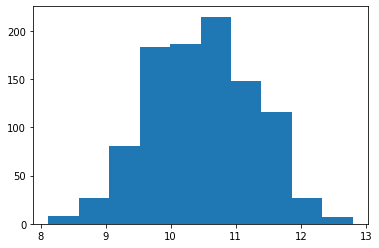

In [54]:
plt.hist(means)

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [ ]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

In [ ]:
w, v = np.linalg.eig(m)

for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))